In [27]:
%load_ext autoreload
%autoreload 2

import torch
from text3d2video.artifacts.animation_artifact import AnimationArtifact
from pytorch3d.renderer import TexturesUV

device = torch.device('cuda')

anim= AnimationArtifact.from_wandb_artifact_tag('cat_rotation_90:latest')

frame = [10]
mesh = anim.load_frames(frame).to(device)
cam = anim.cameras(frame)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
verts_uvs, faces_uvs = anim.texture_data()

texture_res = 32
texture_map = torch.randn(texture_res, texture_res, 3)

texture = TexturesUV(
    verts_uvs=verts_uvs.expand(1, -1, -1).to(device),
    faces_uvs=faces_uvs.expand(1, -1, -1).to(device),
    maps=texture_map.expand(1, -1, -1, -1).to(device),
)

mesh.textures = texture
mesh.textures.sampling_mode = 'nearest'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-3.3505075..3.099066].


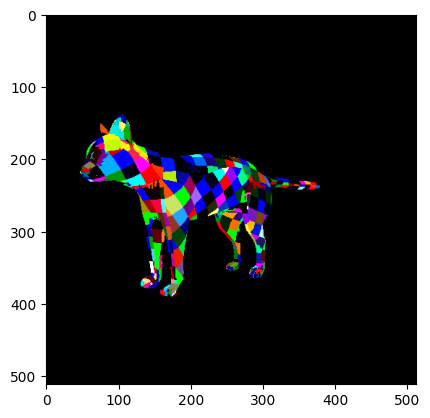

In [50]:
from matplotlib import pyplot as plt
from pytorch3d.renderer import RasterizationSettings, MeshRasterizer, MeshRenderer

from text3d2video.rendering import FeatureShader

render_res = 512

raster_settings = RasterizationSettings(
    image_size=render_res,
    blur_radius=0.0,
    faces_per_pixel=2,
)

rasterizer = MeshRasterizer(
    raster_settings=raster_settings
)

shader = FeatureShader()
renderer = MeshRenderer(rasterizer=rasterizer, shader=shader)

render = renderer(mesh, cameras=cam)

plt.imshow(render[0].cpu())